In [1]:
import pandas as pd
import numpy as np

data=pd.read_csv(r"C:\Users\jaeyeon\Downloads\customer_train.csv")
customer_test=pd.read_csv(r"C:\Users\jaeyeon\Downloads\customer_test.csv")
train_ft=data.copy()

SEED = 42

train_ft=train_ft.drop(['ID','이탈여부'],axis=1) #,'이탈여부']
customer_test=customer_test.drop(['ID'],axis=1)
target = data["이탈여부"]

In [2]:
# combinations = [
#     ('고령자여부',),
#     ('기혼여부',),
#     ('부양가족여부',),
#     ('고령자여부', '기혼여부'),
#     ('고령자여부', '부양가족여부'),
#     ('기혼여부', '부양가족여부'),
#     ('고령자여부', '기혼여부', '부양가족여부')
# ]

# for combo in combinations:
#     column_name = '_'.join(combo)
#     train_ft[column_name] = train_ft[list(combo)].prod(axis=1)
    
# for combo in combinations:
#     column_name = '_'.join(combo)
#     customer_test[column_name] = customer_test[list(combo)].prod(axis=1)

In [3]:
train_ft["가입기간/전체가입기간"] = train_ft["가입기간"]/train_ft["가입기간"].sum()
train_ft["약정기간/전체약정기간"] = train_ft["약정기간"]/train_ft["약정기간"].sum()

customer_test["가입기간/전체가입기간"] = customer_test["가입기간"]/customer_test["가입기간"].sum()
customer_test["약정기간/전체약정기간"] = customer_test["약정기간"]/customer_test["약정기간"].sum()


In [4]:
train_ft["인터넷이용방식"] = train_ft["인터넷이용방식"].fillna("UNK")
customer_test["인터넷이용방식"] = customer_test["인터넷이용방식"].fillna("UNK")

In [5]:
train_ft.isnull().sum().sum() , customer_test.isnull().sum().sum()

(0, 0)

In [6]:
cols = ["인터넷이용방식", "지불방법"]

# Create dummies for the training data
train_ft_dummies = pd.get_dummies(train_ft[cols], drop_first=True)
train_ft = pd.concat([train_ft, train_ft_dummies], axis=1)
train_ft.drop(cols, axis=1, inplace=True)

# Create dummies for the test data
customer_test_dummies = pd.get_dummies(customer_test[cols], drop_first=True)
customer_test = pd.concat([customer_test, customer_test_dummies], axis=1)
customer_test.drop(cols, axis=1, inplace=True)


In [7]:
train_ft['집전화_약정기간_상호작용'] = train_ft['집전화이용여부'].astype('int') * train_ft['약정기간']
train_ft['디지털인터넷집전화']=train_ft['인터넷기술지원서비스사용여부']+train_ft['인터넷이용방식_광']+train_ft['집전화이용여부']


for col in train_ft.columns[train_ft.columns.str.startswith('인터넷이용방식_')]:
    new_col_name = f"{col}_보안서비스_상호작용"
    train_ft[new_col_name] = train_ft[col] * train_ft['인터넷보안서비스사용여부']


customer_test['집전화_약정기간_상호작용'] = customer_test['집전화이용여부'].astype('int') * customer_test['약정기간']
customer_test['디지털인터넷집전화']=customer_test['인터넷기술지원서비스사용여부']+customer_test['인터넷이용방식_광']+customer_test['집전화이용여부']

for col in customer_test.columns[customer_test.columns.str.startswith('인터넷이용방식_')]:
    new_col_name = f"{col}_보안서비스_상호작용"
    customer_test[new_col_name] = customer_test[col] * customer_test['인터넷보안서비스사용여부']

In [8]:
# train_ft['성별_기혼여부_결합'] = train_ft['성별'].astype(str) + "_" + train_ft['기혼여부'].astype(str)
# mapping = {'0_0': 0, '1_0': 1, '0_1': 2, '1_1': 3}
# train_ft['성별_기혼여부_결합'] = train_ft['성별_기혼여부_결합'].map(mapping)

# customer_test['성별_기혼여부_결합'] = customer_test['성별'].astype(str) + "_" + customer_test['기혼여부'].astype(str)
# mapping = {'0_0': 0, '1_0': 1, '0_1': 2, '1_1': 3}
# customer_test['성별_기혼여부_결합'] = customer_test['성별_기혼여부_결합'].map(mapping)

In [9]:
train_ft['평균월별지불액'] = train_ft['총지불요금'] / train_ft['가입기간']
train_ft['지불액_약정기간/전체']=train_ft['평균월별지불액']*train_ft["약정기간/전체약정기간"]
train_ft["평균월별지불액_가입기간/전체가입기간"] =train_ft['평균월별지불액']*train_ft["가입기간/전체가입기간"]

train_ft['평균월별지불액'].fillna(0,inplace=True)
train_ft['지불액_약정기간/전체'].fillna(0,inplace=True)
train_ft['평균월별지불액_가입기간/전체가입기간'].fillna(0,inplace=True)


customer_test['평균월별지불액'] = customer_test['총지불요금'] / customer_test['가입기간']
customer_test['지불액_약정기간/전체']=customer_test['평균월별지불액']*customer_test["약정기간/전체약정기간"]
customer_test["평균월별지불액_가입기간/전체가입기간"] =customer_test['평균월별지불액']*customer_test["가입기간/전체가입기간"]

customer_test['평균월별지불액'].fillna(0,inplace=True)
customer_test['지불액_약정기간/전체'].fillna(0,inplace=True)
customer_test['평균월별지불액_가입기간/전체가입기간'].fillna(0,inplace=True)

In [10]:
# 상호작용 및 다항 특성을 직접 생성
train_ft['가입기간^2'] = train_ft['가입기간'] ** 2
train_ft['한달요금^2'] = train_ft['한달요금'] ** 2

train_ft['가입기간_log'] = train_ft['가입기간']/np.log(train_ft['가입기간'].sum())
train_ft['약정기간_log'] = train_ft['약정기간']/np.log(train_ft['약정기간'].sum())

train_ft['가입기간_약정기간'] = train_ft['가입기간'] *train_ft['약정기간']
train_ft['평균월별지불액^2'] = train_ft['평균월별지불액'] ** 2

train_ft['약정기간_한달요금'] = train_ft['약정기간'] * train_ft['한달요금']
train_ft['가입기간_한달요금'] = train_ft['가입기간'] * train_ft['한달요금']
train_ft['가입기간_평균월별지불액'] = train_ft['가입기간'] * train_ft['평균월별지불액']
train_ft['한달요금_평균월별지불액'] = train_ft['한달요금'] * train_ft['평균월별지불액']

train_ft['약정기간_log_한달요금'] = train_ft['약정기간'] * train_ft['약정기간_log']
train_ft['가입기간_log_한달요금'] = train_ft['가입기간_한달요금'] * train_ft['가입기간_log']
train_ft['가입기간_log_평균월별지불액'] = train_ft['가입기간_평균월별지불액'] * train_ft['가입기간_log']
train_ft['한달요금_log_평균월별지불액'] = train_ft['한달요금_평균월별지불액'] * train_ft['가입기간_log']




# 동일한 과정을 테스트 데이터에 적용
customer_test['가입기간^2'] = customer_test['가입기간'] ** 2
customer_test['한달요금^2'] = customer_test['한달요금'] ** 2

customer_test['가입기간_log'] = customer_test['가입기간']/np.log(customer_test['가입기간'].sum())
customer_test['약정기간_log'] = customer_test['약정기간']/np.log(customer_test['약정기간'].sum())

customer_test['가입기간_약정기간'] = customer_test['가입기간'] *train_ft['약정기간']
customer_test['평균월별지불액^2'] = customer_test['평균월별지불액'] ** 2

customer_test['약정기간_한달요금'] = customer_test['약정기간'] * customer_test['한달요금']
customer_test['가입기간_한달요금'] = customer_test['가입기간'] * customer_test['한달요금']
customer_test['가입기간_평균월별지불액'] = customer_test['가입기간'] * customer_test['평균월별지불액']
customer_test['한달요금_평균월별지불액'] = customer_test['한달요금'] * customer_test['평균월별지불액']

customer_test['약정기간_log_한달요금'] = customer_test['약정기간'] * customer_test['약정기간_log']
customer_test['가입기간_log_한달요금'] = customer_test['가입기간_한달요금'] * customer_test['가입기간_log']
customer_test['가입기간_log_평균월별지불액'] = customer_test['가입기간_평균월별지불액'] * customer_test['가입기간_log']
customer_test['한달요금_log_평균월별지불액'] = customer_test['한달요금_평균월별지불액'] * customer_test['가입기간_log']



In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_ft = pd.DataFrame(scaler.fit_transform(train_ft), columns=train_ft.columns)
customer_test = pd.DataFrame(scaler.transform(customer_test), columns=customer_test.columns)

In [12]:
train_ft

,성별,고령자여부,기혼여부,부양가족여부,가입기간,집전화이용여부,다중회선여부,인터넷보안서비스사용여부,인터넷백업서비스사용여부,기기방화벽서비스사용여부,...,가입기간_약정기간,평균월별지불액^2,약정기간_한달요금,가입기간_한달요금,가입기간_평균월별지불액,한달요금_평균월별지불액,약정기간_log_한달요금,가입기간_log_한달요금,가입기간_log_평균월별지불액,한달요금_log_평균월별지불액
0,1.004065,-0.437160,-0.971205,-0.652757,-0.397349,0.324243,-0.854298,-0.637308,1.380263,-0.729715,...,-0.721466,0.237562,-0.687983,-0.215147,-0.230500,0.271372,-0.723776,-0.507440,-0.512389,-0.223742
1,1.004065,-0.437160,-0.971205,-0.652757,-1.288673,0.324243,-0.854298,-0.637308,-0.724499,-0.729715,...,-0.721466,-0.804578,-0.687983,-0.993147,-0.992152,-0.807160,-0.723776,-0.771313,-0.770891,-0.805210
2,-0.995951,-0.437160,-0.971205,-0.652757,-0.397349,0.324243,1.170552,-0.637308,-0.724499,1.370398,...,-0.721466,1.692400,-0.687983,0.036533,0.070222,1.605830,-0.723776,-0.424117,-0.412813,0.261057
3,1.004065,-0.437160,-0.971205,-0.652757,-0.883525,0.324243,-0.854298,-0.637308,-0.724499,1.370398,...,-0.505990,-0.288803,0.334597,-0.699955,-0.706546,-0.263678,-0.117967,-0.722024,-0.722798,-0.624578
4,1.004065,-0.437160,-0.971205,-0.652757,-1.126614,0.324243,1.170552,-0.637308,-0.724499,-0.729715,...,-0.721466,1.029075,-0.687983,-0.826223,-0.804012,0.789283,-0.723776,-0.758153,-0.756203,-0.644647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,-0.995951,-0.437160,-0.971205,-0.652757,-0.356834,0.324243,-0.854298,-0.637308,1.380263,1.370398,...,-0.721466,0.684044,-0.687983,-0.108352,-0.088803,0.645150,-0.723776,-0.459061,-0.452178,-0.056391
4926,-0.995951,2.287491,1.029648,-0.652757,1.587874,-3.084109,-0.854298,1.569101,1.380263,1.370398,...,2.099314,-0.231551,1.300455,0.979505,1.040914,-0.265641,1.699461,1.293443,1.356844,0.422676
4927,-0.995951,-0.437160,1.029648,1.531963,-0.316319,0.324243,-0.854298,-0.637308,-0.724499,-0.729715,...,-0.231747,-1.240146,-0.374434,-0.794864,-0.790583,-1.246374,-0.117967,-0.693082,-0.691470,-0.771763
4928,-0.995951,-0.437160,1.029648,-0.652757,0.615520,0.324243,1.170552,1.569101,1.380263,1.370398,...,1.159054,0.941628,2.365577,1.026872,0.947983,1.038221,1.699461,0.637822,0.583284,0.999065


In [13]:
customer_test

,성별,고령자여부,기혼여부,부양가족여부,가입기간,집전화이용여부,다중회선여부,인터넷보안서비스사용여부,인터넷백업서비스사용여부,기기방화벽서비스사용여부,...,가입기간_약정기간,평균월별지불액^2,약정기간_한달요금,가입기간_한달요금,가입기간_평균월별지불액,한달요금_평균월별지불액,약정기간_log_한달요금,가입기간_log_한달요금,가입기간_log_평균월별지불액,한달요금_log_평균월별지불액
0,-0.995951,-0.437160,-0.971205,-0.652757,-1.005070,0.324243,-0.854298,-0.637308,-0.724499,1.370398,...,-0.721466,0.909345,-0.687983,-0.680789,-0.687684,0.967400,-0.723776,-0.730262,-0.730816,-0.497056
1,1.004065,-0.437160,-0.971205,-0.652757,0.777579,0.324243,-0.854298,1.569101,-0.724499,-0.729715,...,-0.721466,-0.721167,-0.687983,0.121552,0.098899,-0.710602,-0.723776,0.145931,0.127377,-0.243853
2,-0.995951,-0.437160,1.029648,-0.652757,-0.518893,0.324243,-0.854298,-0.637308,-0.724499,-0.729715,...,-0.721466,0.836040,-0.687983,-0.232383,-0.214420,0.792040,-0.723776,-0.528787,-0.523048,-0.081746
3,-0.995951,2.287491,1.029648,-0.652757,1.506844,0.324243,-0.854298,1.569101,1.380263,1.370398,...,0.649747,1.687714,2.631857,2.221261,2.279270,1.640486,2.001316,2.749282,2.812400,2.761999
4,1.004065,-0.437160,-0.971205,-0.652757,-1.288673,0.324243,-0.854298,1.569101,-0.724499,-0.729715,...,-0.721466,-0.729125,-0.687983,-0.991809,-0.990816,-0.731370,-0.723776,-0.771269,-0.770847,-0.803223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,1.004065,-0.437160,-0.971205,-0.652757,-0.275804,0.324243,1.170552,-0.637308,-0.724499,1.370398,...,-0.721466,1.287985,-0.687983,0.132955,0.127115,1.308034,-0.723776,-0.308224,-0.310489,0.366826
2109,-0.995951,-0.437160,1.029648,-0.652757,-0.073231,0.324243,-0.854298,1.569101,1.380263,1.370398,...,-0.721466,0.264403,0.501613,0.013442,0.050221,0.210516,-0.042503,-0.276730,-0.258972,0.013260
2110,1.004065,-0.437160,1.029648,1.531963,1.587874,0.324243,1.170552,-0.637308,-0.724499,-0.729715,...,-0.721466,-1.185455,0.106131,-0.217296,-0.228922,-1.187267,2.001316,0.119418,0.105846,-0.610312
2111,-0.995951,-0.437160,-0.971205,1.531963,0.250887,0.324243,1.170552,-0.637308,-0.724499,-0.729715,...,-0.721466,-1.173079,0.099829,-0.585441,-0.571991,-1.182437,2.001316,-0.512247,-0.504234,-0.700377


In [1313]:
train_ft['이탈여부']=target
train_ft

,성별,고령자여부,기혼여부,부양가족여부,가입기간,집전화이용여부,다중회선여부,인터넷보안서비스사용여부,인터넷백업서비스사용여부,기기방화벽서비스사용여부,...,평균월별지불액^2,약정기간_한달요금,가입기간_한달요금,가입기간_평균월별지불액,한달요금_평균월별지불액,약정기간_log_한달요금,가입기간_log_한달요금,가입기간_log_평균월별지불액,한달요금_log_평균월별지불액,이탈여부
0,1.004065,-0.437160,-0.971205,-0.652757,-0.397349,0.324243,-0.854298,-0.637308,1.380263,-0.729715,...,0.237562,-0.687983,-0.215147,-0.230500,0.271372,-0.723776,-0.507440,-0.512389,-0.223742,0
1,1.004065,-0.437160,-0.971205,-0.652757,-1.288673,0.324243,-0.854298,-0.637308,-0.724499,-0.729715,...,-0.804578,-0.687983,-0.993147,-0.992152,-0.807160,-0.723776,-0.771313,-0.770891,-0.805210,1
2,-0.995951,-0.437160,-0.971205,-0.652757,-0.397349,0.324243,1.170552,-0.637308,-0.724499,1.370398,...,1.692400,-0.687983,0.036533,0.070222,1.605830,-0.723776,-0.424117,-0.412813,0.261057,1
3,1.004065,-0.437160,-0.971205,-0.652757,-0.883525,0.324243,-0.854298,-0.637308,-0.724499,1.370398,...,-0.288803,0.334597,-0.699955,-0.706546,-0.263678,-0.117967,-0.722024,-0.722798,-0.624578,0
4,1.004065,-0.437160,-0.971205,-0.652757,-1.126614,0.324243,1.170552,-0.637308,-0.724499,-0.729715,...,1.029075,-0.687983,-0.826223,-0.804012,0.789283,-0.723776,-0.758153,-0.756203,-0.644647,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,-0.995951,-0.437160,-0.971205,-0.652757,-0.356834,0.324243,-0.854298,-0.637308,1.380263,1.370398,...,0.684044,-0.687983,-0.108352,-0.088803,0.645150,-0.723776,-0.459061,-0.452178,-0.056391,0
4926,-0.995951,2.287491,1.029648,-0.652757,1.587874,-3.084109,-0.854298,1.569101,1.380263,1.370398,...,-0.231551,1.300455,0.979505,1.040914,-0.265641,1.699461,1.293443,1.356844,0.422676,0
4927,-0.995951,-0.437160,1.029648,1.531963,-0.316319,0.324243,-0.854298,-0.637308,-0.724499,-0.729715,...,-1.240146,-0.374434,-0.794864,-0.790583,-1.246374,-0.117967,-0.693082,-0.691470,-0.771763,0
4928,-0.995951,-0.437160,1.029648,-0.652757,0.615520,0.324243,1.170552,1.569101,1.380263,1.370398,...,0.941628,2.365577,1.026872,0.947983,1.038221,1.699461,0.637822,0.583284,0.999065,0


In [1314]:
from pycaret.classification import *

# PyCaret 설정 초기화
clf = setup(data=train_ft, target='이탈여부', session_id=123,
            use_gpu=True, # GPU 사용 활성화
            fold_strategy='stratifiedkfold', # 교차 검증 전략
            fold=10) # 10겹 교차 검증

# 모델 비교 (15개 모델 포함, 5겹 교차 검증 사용, ROC AUC로 정렬)
best_model = compare_models(n_select=1, include=['lightgbm', 'xgboost', 'catboost', 'gbc', 'rf', 'et', 'ada', 'dt', 'knn', 'nb', 'lr'],
                            cross_validation=True, sort='AUC')

# 최고의 모델 출력
print(best_model)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

,Description,Value
0,Session id,123
1,Target,이탈여부
2,Target type,Binary
3,Original data shape,"(4930, 46)"
4,Transformed data shape,"(4930, 46)"
5,Transformed train set shape,"(3451, 46)"
6,Transformed test set shape,"(1479, 46)"
7,Numeric features,45
8,Preprocess,True
9,Imputation type,simple


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8050,0.8451,0.5359,0.6649,0.5928,0.4667,0.4718,0.1500
gbc,Gradient Boosting Classifier,0.8024,0.8392,0.5435,0.6551,0.5933,0.4644,0.4684,3.2050
ada,Ada Boost Classifier,0.7998,0.8385,0.5480,0.6460,0.5923,0.4608,0.4640,0.7750
lightgbm,Light Gradient Boosting Machine,0.7847,0.8249,0.5175,0.6126,0.5604,0.4193,0.4223,3.1820
nb,Naive Bayes,0.6844,0.8202,0.8581,0.4513,0.5913,0.3729,0.4242,0.0470
rf,Random Forest Classifier,0.7879,0.8159,0.5098,0.6247,0.5607,0.4229,0.4271,0.6210
et,Extra Trees Classifier,0.7833,0.8142,0.5010,0.6131,0.5502,0.4096,0.4139,0.5210
xgboost,Extreme Gradient Boosting,0.7821,0.8137,0.5305,0.6033,0.5638,0.4195,0.4215,0.3810
knn,K Neighbors Classifier,0.7667,0.7813,0.5305,0.5687,0.5478,0.3911,0.3923,0.0780
dt,Decision Tree Classifier,0.7236,0.6470,0.4835,0.4803,0.4812,0.2930,0.2934,0.1080


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [1315]:
train_ft.drop('이탈여부',axis=1,inplace=True)

## 제출했던 1회 모델중 최고점 모델

In [29]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# KFold 교차 검증 설정
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# 모델 초기화
model = LogisticRegression(random_state=SEED, max_iter=1000)

hp = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'tol': [0.0001, 0.0005, 0.001, 0.002]
}

# 'liblinear'는 'l1'과 'l2'를 지원합니다.
# 'lbfgs', 'newton-cg', 'sag'는 'l2'와 'none'을 지원합니다.
# 'saga'는 모든 패널티를 지원합니다.
penalty_solver_combinations = {
    'l1': ['liblinear', 'saga'],
    'l2': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'elasticnet': ['saga'],
    'none': ['lbfgs', 'newton-cg', 'sag', 'saga']
}
# 각 조합에 대해 하이퍼파라미터 세트를 생성합니다.
param_grid = []
for penalty, solvers in penalty_solver_combinations.items():
    for solver in solvers:
        params = {'penalty': [penalty], 'solver': [solver], 'C': np.logspace(-4, 4, 20), 'tol': [0.0001, 0.0005, 0.001, 0.002]}
        if penalty == 'elasticnet':
            params['l1_ratio'] = np.linspace(0, 1, 10)
        param_grid.append(params)

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(
    model, 
    param_grid, 
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42,
    n_iter=100
)

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(
    model, 
    param_grid, 
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    random_state=42,
    n_iter=100
)

# 모델 학습
random_search.fit(train_ft, target)
random_search.best_score_

0.8062880324543611

In [30]:
random_search.best_estimator_

LogisticRegression(C=0.004832930238571752, l1_ratio=0.1111111111111111,
                   max_iter=1000, penalty='elasticnet', random_state=42,
                   solver='saga')

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train_ft,target,test_size=0.25,random_state=42)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_reporta


best_model=LogisticRegression(C=0.004832930238571752, l1_ratio=0.1111111111111111,
                   max_iter=1000, penalty='elasticnet', random_state=42,
                   solver='saga')

best_model.fit(train_ft, target)

# Make predictions

y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy)

ImportError: cannot import name 'classification_reporta' from 'sklearn.metrics' (C:\Users\jaeyeon\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


best_model=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

best_model.fit(train_ft, target)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       913
           1       0.66      0.54      0.59       320

    accuracy                           0.81      1233
   macro avg       0.75      0.72      0.73      1233
weighted avg       0.80      0.81      0.80      1233

Confusion Matrix:
[[824  89]
 [147 173]]
Accuracy: 0.8085969180859692


In [1322]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


best_model=LogisticRegression(C= 0.1, max_iter= 100, penalty= 'l2', solver='newton-cg',random_state=42 ) 

best_model.fit(X_train, y_train)



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       710
           1       0.67      0.53      0.59       276

    accuracy                           0.80       986
   macro avg       0.75      0.71      0.73       986
weighted avg       0.79      0.80      0.79       986

Confusion Matrix:
[[639  71]
 [131 145]]
Accuracy: 0.795131845841785


In [1253]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=SEED)

model = RandomForestClassifier(random_state=SEED)
hp = {
    "n_estimators": range(100,201,2), # 트리수
    "criterion" : ["gini", "entropy"],
    "max_depth" : range(5,51,2),
    "min_samples_split" : range(2,21,1),
    "max_features": ["sqrt", "log2", None]
}

random_search = RandomizedSearchCV(
   model, # 모델 객체
   hp, # 하이퍼 파라미터 탐색 범위(딕셔너리 형태 그대로 전달할 것)
   cv = cv,
   scoring="roc_auc",
   n_jobs=-1,
   random_state = SEED,
   n_iter = 20
)
random_search.fit(train_ft, target)

y_pred = random_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       710
           1       0.68      0.52      0.59       276

    accuracy                           0.80       986
   macro avg       0.76      0.71      0.73       986
weighted avg       0.79      0.80      0.79       986

Confusion Matrix:
[[643  67]
 [132 144]]
Accuracy: 0.7981744421906694


In [19]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier


cv = KFold(n_splits=5, shuffle=True, random_state=SEED)

model = GradientBoostingClassifier(random_state=SEED)
hp = {
    'loss': ['log_loss', 'exponential'],  # 'log_loss'는 올바른 옵션이 아닙니다.
    'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5],
    'n_estimators': [100, 150],
    'subsample': [1.0],  # 변경할 필요가 없으면 리스트에 하나의 값만 넣을 수 있습니다.
    'criterion': ['friedman_mse', 'squared_error'],
    'min_samples_split': [2, 3, 4, 5],  # 적절한 값의 범위를 선택하세요.
    'min_samples_leaf': [1, 2, 3, 4],  # 여기서도 마찬가지입니다.
    'max_depth': [15, 20],
    'min_impurity_decrease': [0.1, 0.15, 0.2, 0.25, 0.3]
}



random_search = RandomizedSearchCV(
   model, # 모델 객체
   hp, # 하이퍼 파라미터 탐색 범위(딕셔너리 형태 그대로 전달할 것)
   cv = cv,
   scoring="roc_auc",
   n_jobs=-1,
   random_state = SEED,
   n_iter = 20
)

In [ ]:
random_search.fit(train_ft, target)

In [23]:
print(random_search.best_score_)

0.8256725356673483


In [1327]:
random_search.fit(train_ft, target)

y_pred = random_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       710
           1       0.95      0.88      0.92       276

    accuracy                           0.95       986
   macro avg       0.95      0.93      0.94       986
weighted avg       0.95      0.95      0.95       986

Confusion Matrix:
[[698  12]
 [ 33 243]]
Accuracy: 0.9543610547667343


In [1272]:
coef = best_model.coef_[0]
feature_names = X.columns
feature_importance = abs(coef)

importances = []
features = []

for i, name in enumerate(feature_names):
    importance = abs(coef[i])
    features.append(name)
    importances.append(importance)

important_features = pd.DataFrame({
    'features' : features,
    'importance' : importances
})

AttributeError: 'GradientBoostingClassifier' object has no attribute 'coef_'

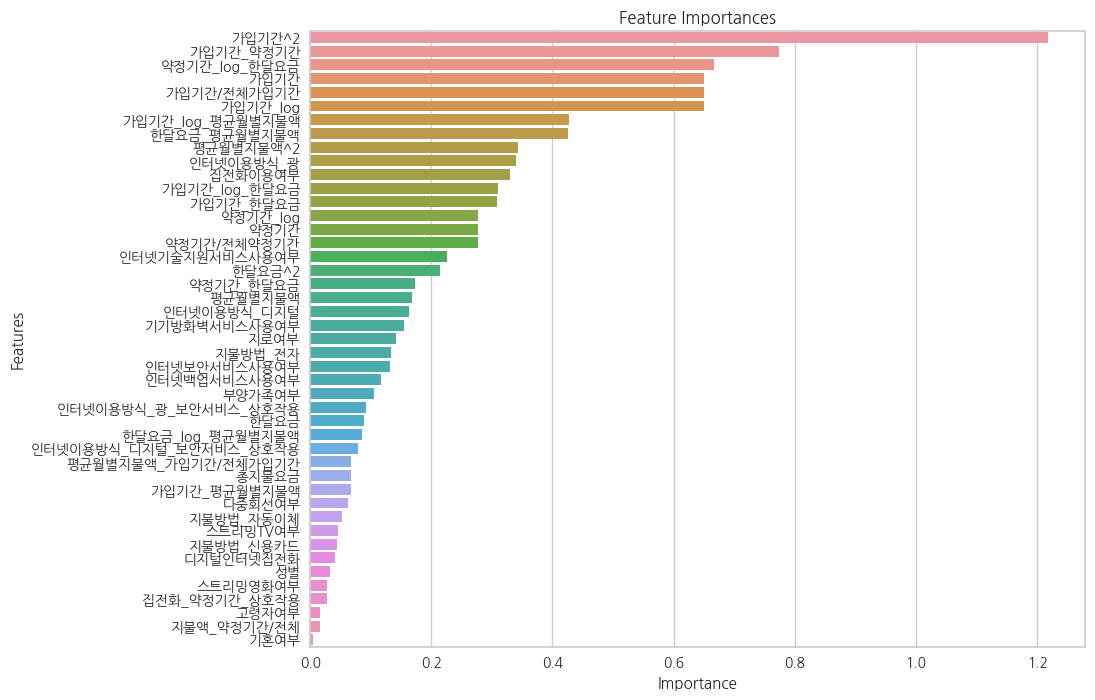

In [1273]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumGothic')

# Sort the DataFrame by the 'importance' column in descending order
sorted_important_features = important_features.sort_values(by='importance', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='features', data=sorted_important_features)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [1278]:
best_model.fit(train_ft,target)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='deviance', max_depth=15,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.3, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=150, n_iter_no_change=None,
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [1329]:
pred=random_search.predict_proba(customer_test)

submit = pd.DataFrame(pred[:,1], columns = ["target"])
submit

,target
0,0.670180
1,0.352593
2,0.694011
3,0.152575
4,0.772620
...,...
2108,0.667385
2109,0.052978
2110,0.037106
2111,0.037106


In [1330]:
submit.to_csv("그리디언트(정재연).csv",index=False)